# EDA for Speech Recordings Data

### Dependencies

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa

### Load Data

In [6]:
file_path = "datasets/OSA_DB_UPM_vowels.xlsx"
df = pd.read_excel(file_path)

audio_directory = "datasets/SPEECH_VOWELS/SPEECH_VOWELS"

In [7]:
df.shape

(3205, 10)

### Dataset stastics

In [9]:
df['Wav_File'].nunique()

3200

In [12]:
df['Vowel'].value_counts()

Vowel
a    641
e    641
i    641
o    641
u    641
Name: count, dtype: int64

In [13]:
df.describe()

,Gender,IAH,Weight,Age,Height,Cervical,BMI
count,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000
mean,0.712949,20.156412,87.737493,49.405839,171.349367,40.648744,29.844530
std,0.452456,18.530961,18.240283,12.424261,9.536141,3.898690,5.589400
min,0.000000,0.000000,45.000000,19.000000,144.000000,30.000000,18.289895
25%,0.000000,6.100000,75.000000,40.000000,165.000000,38.000000,26.037494
50%,1.000000,14.000000,86.000000,49.000000,171.000000,41.000000,28.734672
75%,1.000000,30.000000,98.000000,59.000000,178.000000,43.000000,32.690542
max,1.000000,108.600000,165.000000,88.000000,197.000000,53.000000,63.654952


In [14]:
df.head()

,Patient,Gender,IAH,Weight,Age,Height,Cervical,BMI,Wav_File,Vowel
0,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F5R1.wav,a
1,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F6R1.wav,e
2,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F7R1.wav,i
3,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F8R1.wav,o
4,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F9R1.wav,u


### Audio Statistics

Duration:

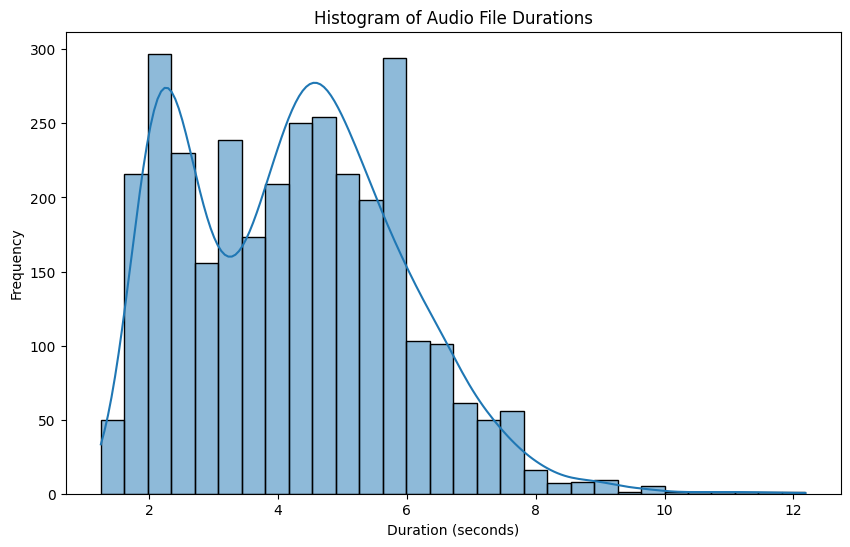

In [18]:
# Calculate the duration of each audio file and add it to the dataframe
def get_duration(file, audio_directory):
    y, sr = librosa.load(os.path.join(audio_directory, file))
    return librosa.get_duration(y=y, sr=sr)

df['duration'] = df['Wav_File'].apply(lambda x: get_duration(x, audio_directory))

# Visualize the duration of each audio file (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Audio File Durations')
plt.show()

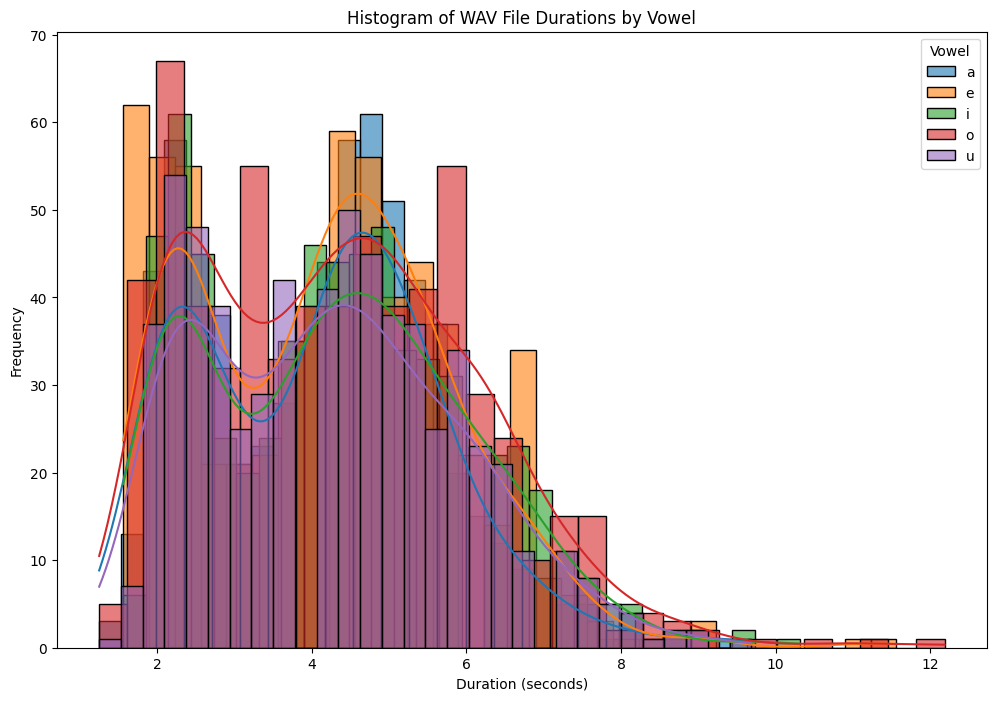

In [25]:
# Plot the distribution of durations for each vowel
vowels = df['Vowel'].unique()
plt.figure(figsize=(12, 8))

for vowel in vowels:
    subset = df[df['Vowel'] == vowel]
    sns.histplot(subset['duration'], bins=30, kde=True, label=vowel, alpha=0.6)

plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of WAV File Durations by Vowel')
plt.legend(title='Vowel')
plt.show()

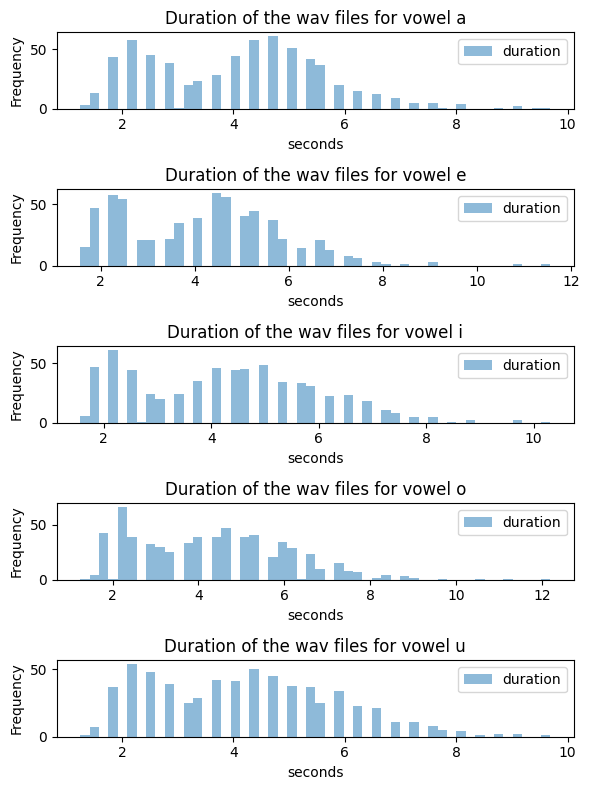

In [29]:
# Plot the distribution of the duration of the wav files for each vowel
fig, axs = plt.subplots(len(df['Vowel'].unique()), 1, figsize=(6, 8))

for i, (vowel, group) in enumerate(df.groupby('Vowel')):
    ax = axs[i]
    group['duration'].plot(kind='hist', bins=50, alpha=0.5, legend=True, ax=ax)
    ax.set_xlabel('seconds')
    ax.set_title(f'Duration of the wav files for vowel {vowel}')

plt.tight_layout()
plt.show()



In [31]:
# Add the durations in a new column to the dataframe
df['duration'] = df['Wav_File'].apply(lambda x: get_duration(x, audio_directory))

# Display the dataframe with the new column
df.head()

,Patient,Gender,IAH,Weight,Age,Height,Cervical,BMI,Wav_File,Vowel,duration,mean_amplitude,variance_amplitude
0,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F5R1.wav,a,3.125034,0.123144,0.012658
1,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F6R1.wav,e,2.500000,0.096634,0.006936
2,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F7R1.wav,i,2.500000,0.106830,0.005546
3,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F8R1.wav,o,2.500000,0.182314,0.028198
4,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F9R1.wav,u,2.500000,0.123820,0.008371


Sample rate:

In [20]:
# Process the wav files in df['wav_file'] to get the duration and sample rate
def get_duration_sample_rate(file, audio_directory):
    y, sr = librosa.load(audio_directory + '\\' + file)
    duration = librosa.get_duration(y=y, sr=sr)
    return duration, sr


In [21]:
# Check the sample rate of each file to ensure consistency
sample_rates = df['Wav_File'].apply(lambda x: get_duration_sample_rate(x, audio_directory)[1])

# Check if all sample rates are the same
consistent_sample_rate = sample_rates.nunique() == 1

print(f"All files have the same sample rate: {consistent_sample_rate}")
if not consistent_sample_rate:
    print("Sample rates found:", sample_rates.unique())

All files have the same sample rate: True


In [28]:
sample_rates[0]

22050

Since all files have the same sample rates, adding it as a feature won't improve the model performance.

Amplitude

In [30]:
# Function to calculate mean and variance of amplitude
def get_amplitude_stats(file, audio_directory):
    y, sr = librosa.load(os.path.join(audio_directory, file))
    mean_amplitude = np.mean(np.abs(y))
    variance_amplitude = np.var(np.abs(y))
    return mean_amplitude, variance_amplitude

# Apply the function to each file and add the results to the dataframe
df['mean_amplitude'] = df['Wav_File'].apply(lambda x: get_amplitude_stats(x, audio_directory)[0])
df['variance_amplitude'] = df['Wav_File'].apply(lambda x: get_amplitude_stats(x, audio_directory)[1])

# Display the dataframe with the new columns
df.head()

,Patient,Gender,IAH,Weight,Age,Height,Cervical,BMI,Wav_File,Vowel,duration,mean_amplitude,variance_amplitude
0,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F5R1.wav,a,3.125034,0.123144,0.012658
1,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F6R1.wav,e,2.500000,0.096634,0.006936
2,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F7R1.wav,i,2.500000,0.106830,0.005546
3,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F8R1.wav,o,2.500000,0.182314,0.028198
4,P0004,1,19.7,78.0,39.0,168.0,42.0,27.636054,LB4_F9R1.wav,u,2.500000,0.123820,0.008371


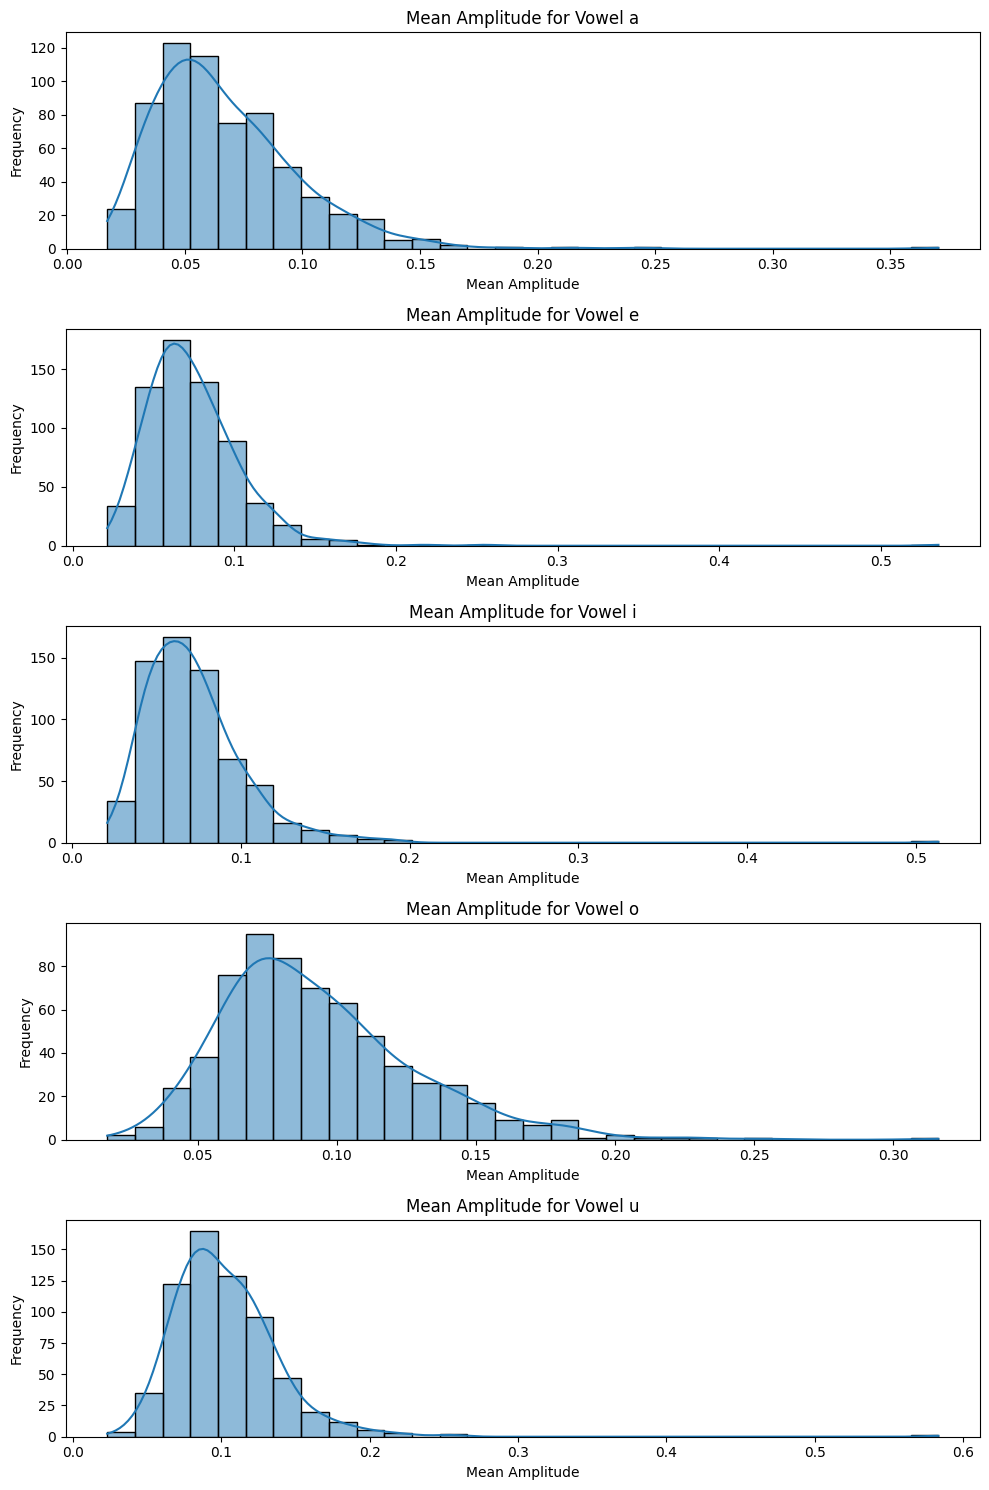

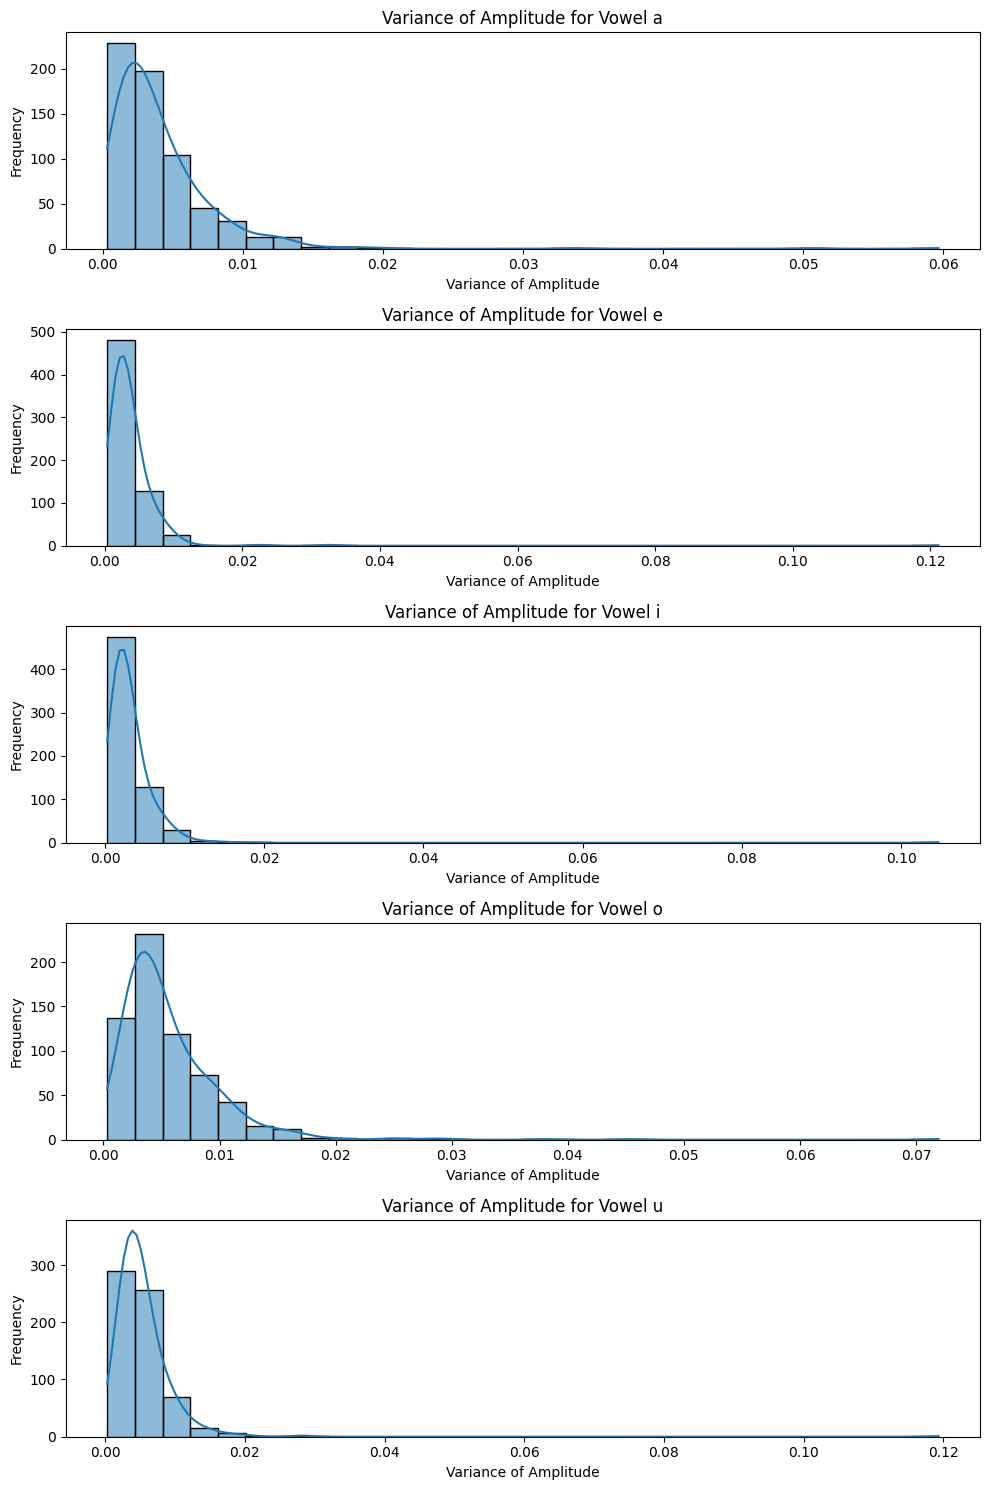

In [33]:
# Plot the mean amplitude for each vowel separately
fig, axs = plt.subplots(len(vowels), 1, figsize=(10, 15))

for i, vowel in enumerate(vowels):
    subset = df[df['Vowel'] == vowel]
    ax = axs[i]
    sns.histplot(subset['mean_amplitude'], bins=30, kde=True, ax=ax)
    ax.set_title(f'Mean Amplitude for Vowel {vowel}')
    ax.set_xlabel('Mean Amplitude')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot the variance of amplitude for each vowel separately
fig, axs = plt.subplots(len(vowels), 1, figsize=(10, 15))

for i, vowel in enumerate(vowels):
    subset = df[df['Vowel'] == vowel]
    ax = axs[i]
    sns.histplot(subset['variance_amplitude'], bins=30, kde=True, ax=ax)
    ax.set_title(f'Variance of Amplitude for Vowel {vowel}')
    ax.set_xlabel('Variance of Amplitude')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

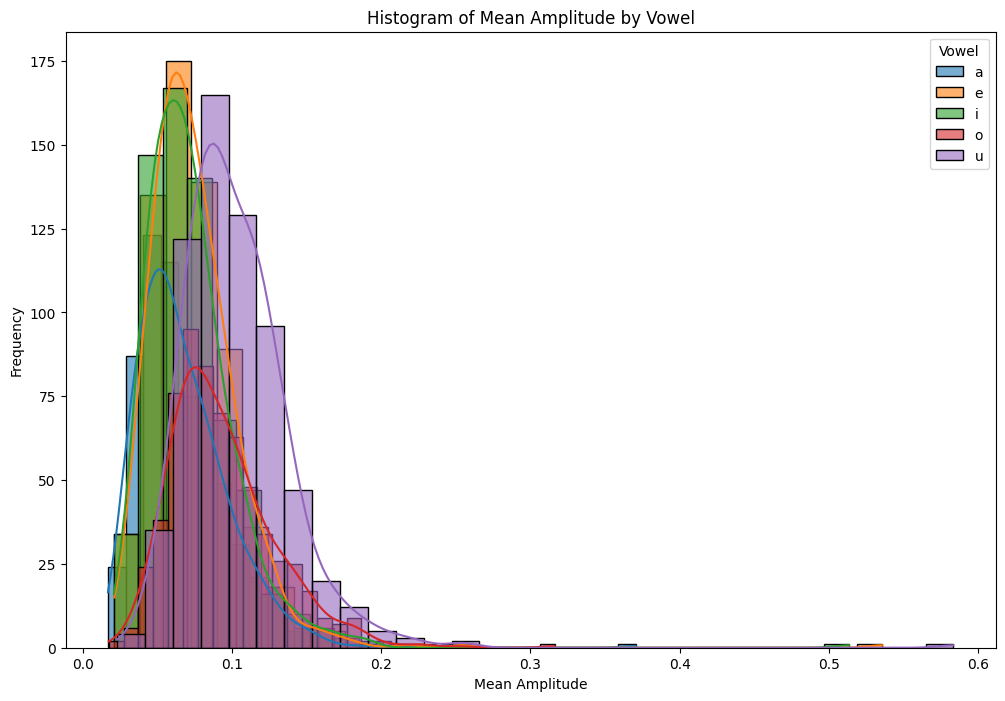

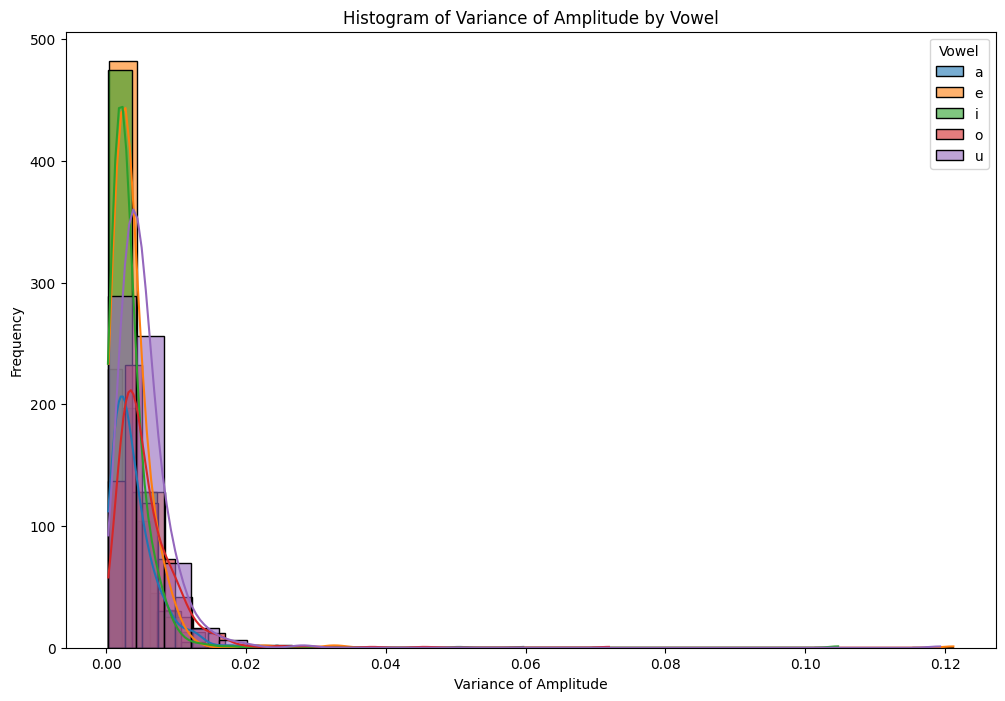

In [32]:
# Plot the distribution of mean amplitude for each vowel
plt.figure(figsize=(12, 8))

for vowel in vowels:
    subset = df[df['Vowel'] == vowel]
    sns.histplot(subset['mean_amplitude'], bins=30, kde=True, label=vowel, alpha=0.6)

plt.xlabel('Mean Amplitude')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Amplitude by Vowel')
plt.legend(title='Vowel')
plt.show()

# Plot the distribution of variance of amplitude for each vowel
plt.figure(figsize=(12, 8))

for vowel in vowels:
    subset = df[df['Vowel'] == vowel]
    sns.histplot(subset['variance_amplitude'], bins=30, kde=True, label=vowel, alpha=0.6)

plt.xlabel('Variance of Amplitude')
plt.ylabel('Frequency')
plt.title('Histogram of Variance of Amplitude by Vowel')
plt.legend(title='Vowel')
plt.show()

### Waveform Analysis:

Plot Waveforms

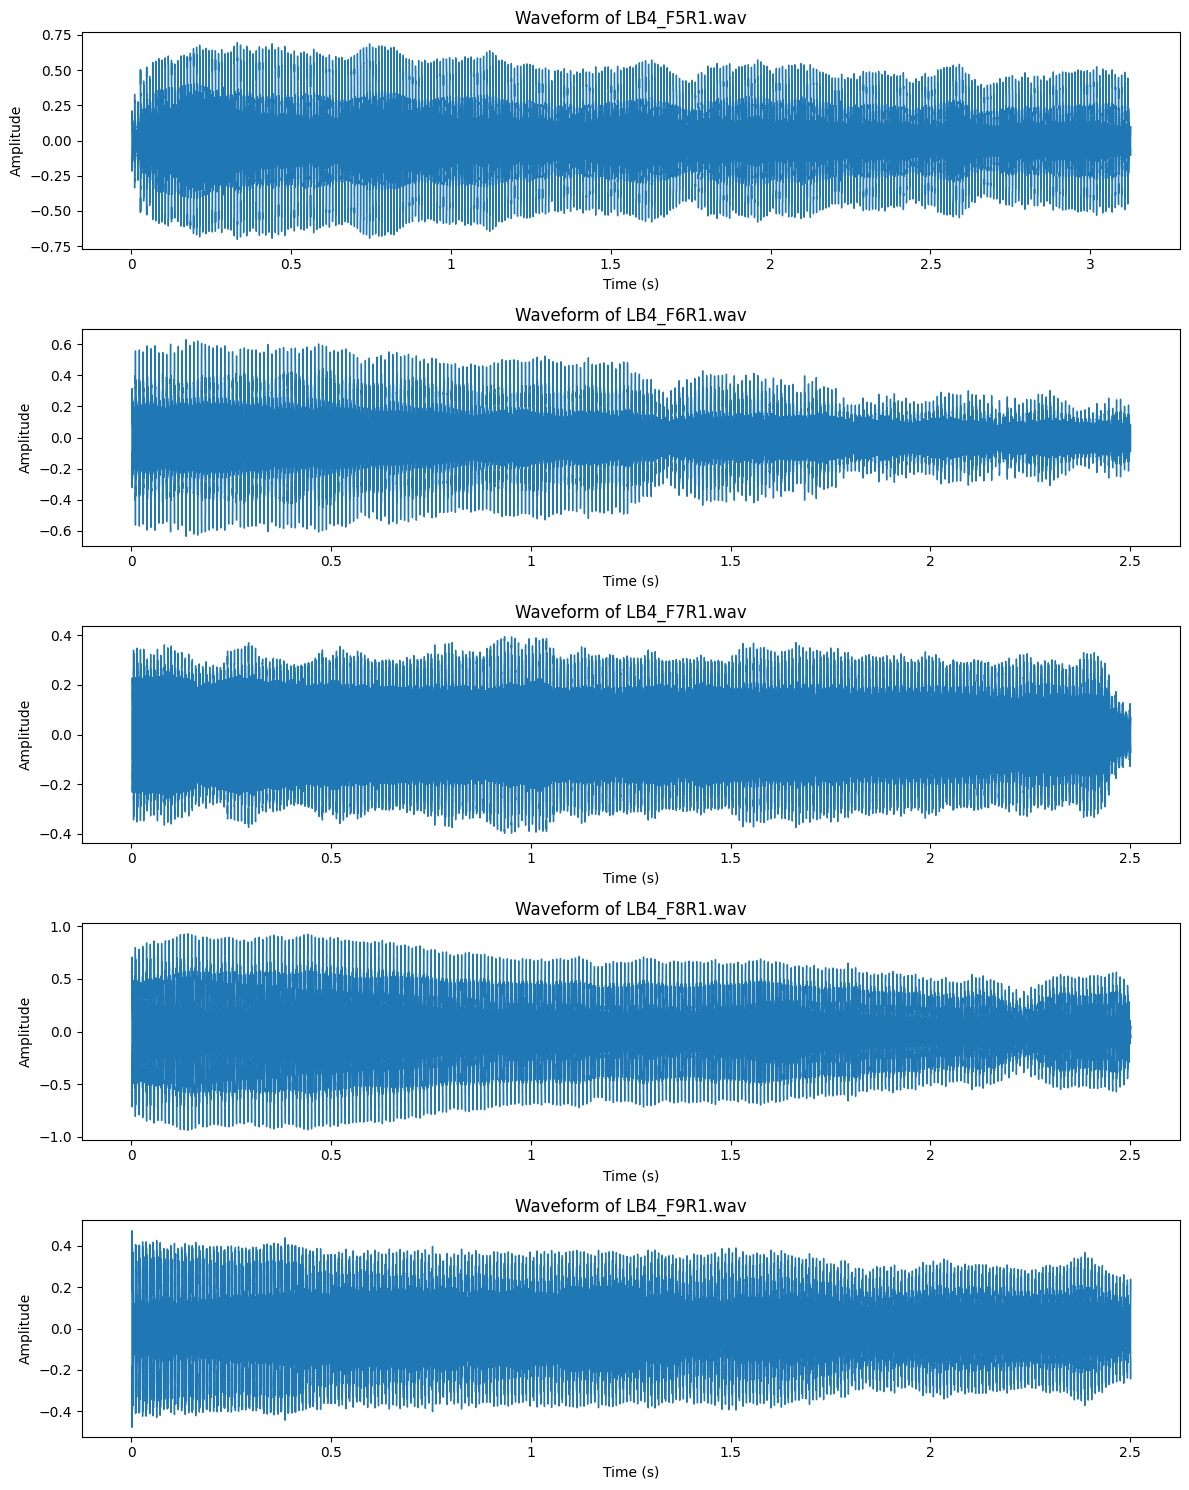

In [34]:
# Function to plot waveform
def plot_waveform(file, audio_directory, ax):
    y, sr = librosa.load(os.path.join(audio_directory, file))
    librosa.display.waveshow(y, sr=sr, ax=ax)
    ax.set_title(f'Waveform of {file}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')

# Plot waveforms for a sample of each vowel
fig, axs = plt.subplots(len(vowels), 1, figsize=(12, 15))

for i, vowel in enumerate(vowels):
    sample_file = df[df['Vowel'] == vowel].iloc[0]['Wav_File']
    plot_waveform(sample_file, audio_directory, axs[i])

plt.tight_layout()
plt.show()